In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path='/content/drive/MyDrive/Data mining and Machine learning/heart.csv'

In [5]:
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df_target = df.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64

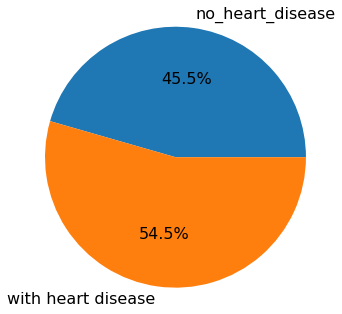

In [11]:
plt.pie(df_target.values, labels = ["no_heart_disease","with heart disease"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


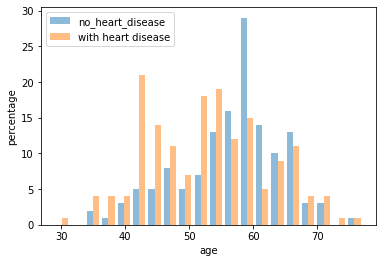

In [12]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ratio get higher over the age of forty. That is, people who is over forty is under high risk of heart disease.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


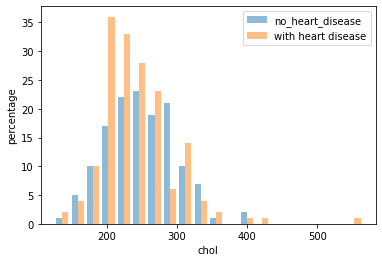

In [13]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

Also, amounts of people having heart disease are over 200mg/dl of chol. According to the research, the normal value of chol should be lower than 200mg/dl.

How about the resting blood pressure?

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


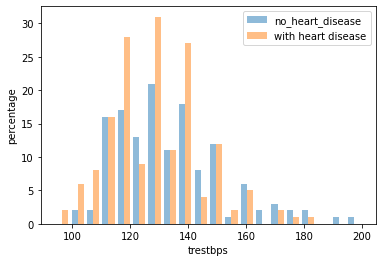

In [14]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. Whether the patients have heart disease or not , over 50% patients have higher blood pressure.

Maximum heart rate is negatively related to the age. Let's see the distribution.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


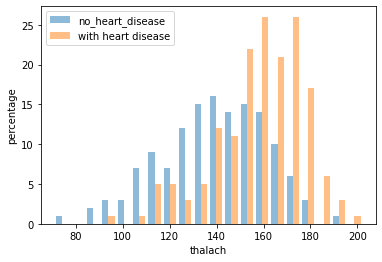

In [15]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Interesting outcome. It seems that the medium of patient with heart disease is higher.

Before modeling the dataset, let's find out if there are outliers inside the dataset. We check the contineous data by boxplot.

In [16]:
# df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
# df_1.describe()

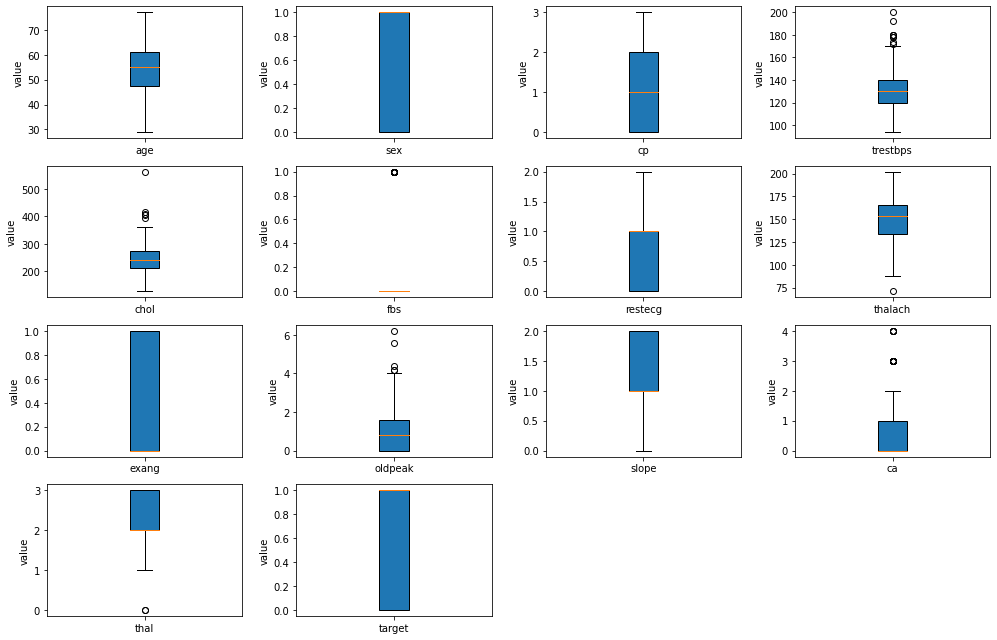

In [17]:
plt.figure(figsize=(14,9))
for item in df.columns:
    plt.subplot(4,4,list(df.columns).index(item)+1)
    plt.boxplot(df[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

In [18]:
#for item in df_1.columns:
def outliers(df_1,item):
  Q1=df_1[item].quantile(0.25)
  Q3=df_1[item].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-(1.5*IQR)
  upper_limit=Q3+(1.5*IQR)
  ls=df_1.index[(df_1[item]<lower_limit)|(df_1[item]>upper_limit)]
  return ls 
index_list=[]
for item in df.columns:
  index_list.extend(outliers(df,item))
index_list

[8,
 101,
 110,
 203,
 223,
 241,
 248,
 260,
 266,
 28,
 85,
 96,
 220,
 246,
 0,
 8,
 14,
 23,
 26,
 28,
 29,
 36,
 60,
 64,
 76,
 78,
 83,
 87,
 90,
 93,
 97,
 99,
 103,
 106,
 111,
 136,
 137,
 169,
 170,
 176,
 197,
 203,
 214,
 215,
 217,
 219,
 222,
 223,
 231,
 251,
 252,
 260,
 269,
 278,
 281,
 282,
 292,
 297,
 300,
 272,
 101,
 204,
 221,
 250,
 291,
 52,
 92,
 97,
 99,
 158,
 163,
 164,
 165,
 181,
 191,
 204,
 208,
 217,
 220,
 231,
 234,
 238,
 247,
 249,
 250,
 251,
 252,
 255,
 267,
 291,
 48,
 281]

In [19]:
def remove(df_1,index_list):
  index_list=sorted(set(index_list))
  df_1=df_1.drop(index_list)
  return df_1
df_no_outliers=remove(df,index_list)

In [20]:
df_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


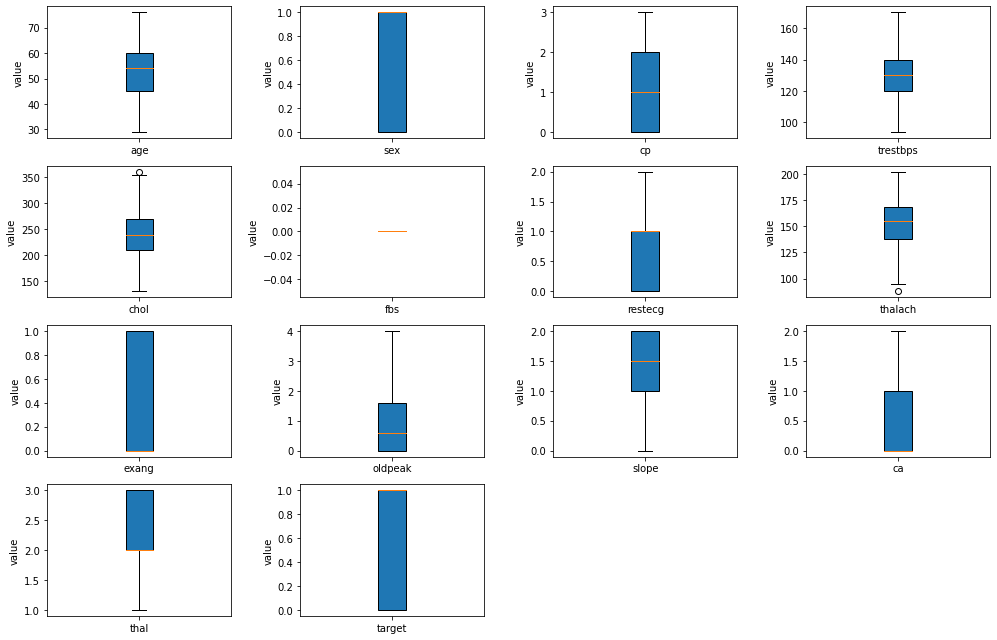

In [21]:
plt.figure(figsize=(14,9))
for item in df_no_outliers.columns:
    plt.subplot(4,4,list(df_no_outliers.columns).index(item)+1)
    plt.boxplot(df_no_outliers[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

There are outliers in each features except age. We define the outliers that are not in the range of 3 sigma.

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for item in df_no_outliers.columns:
  df_no_outliers[item]=mms.fit_transform(df_no_outliers[[item]])

In [23]:
df_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,0.170213,1.0,0.666667,0.473684,0.519651,0.0,0.5,0.868421,0.0,0.875,0.0,0.0,0.5,1.0
2,0.255319,0.0,0.333333,0.473684,0.318777,0.0,0.0,0.736842,0.0,0.350,1.0,0.0,0.5,1.0
3,0.574468,1.0,0.333333,0.342105,0.458515,0.0,0.5,0.789474,0.0,0.200,1.0,0.0,0.5,1.0
4,0.595745,0.0,0.000000,0.342105,0.973799,0.0,0.5,0.657895,1.0,0.150,1.0,0.0,0.5,1.0
5,0.595745,1.0,0.000000,0.605263,0.266376,0.0,0.5,0.526316,0.0,0.100,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.723404,0.0,0.000000,0.394737,0.288210,0.0,0.5,0.421053,1.0,0.000,0.5,0.0,0.5,0.0
298,0.595745,0.0,0.000000,0.605263,0.480349,0.0,0.5,0.307018,1.0,0.050,0.5,0.0,1.0,0.0
299,0.340426,1.0,1.000000,0.210526,0.580786,0.0,0.5,0.385965,0.0,0.300,0.5,0.0,1.0,0.0
301,0.595745,1.0,0.000000,0.473684,0.000000,0.0,0.5,0.236842,1.0,0.300,0.5,0.5,1.0,0.0


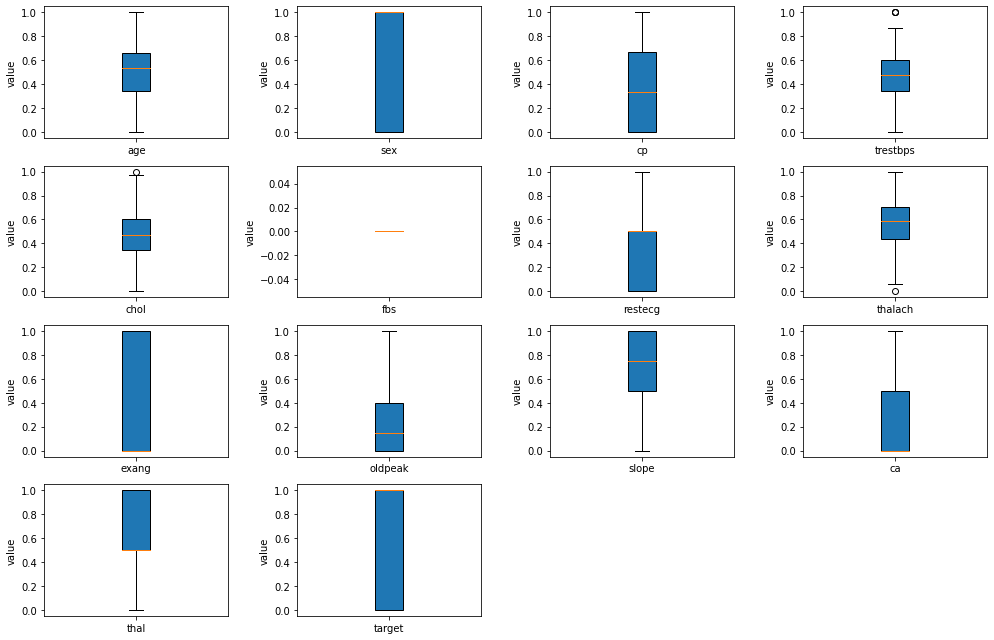

In [24]:
plt.figure(figsize=(14,9))
for item in df_no_outliers.columns:
    plt.subplot(4,4,list(df_no_outliers.columns).index(item)+1)
    plt.boxplot(df_no_outliers[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

In [25]:
X = df_no_outliers.drop("target",axis=1).values
Y = df_no_outliers["target"].astype("int").values
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=10)

Model Training

LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [27]:
linear.fit(X_train, Y_train)

LinearRegression()

In [28]:
linear.score(X_train, Y_train)

0.5280711985812327

In [29]:
linear.score(X_test, Y_test)

0.5107923365572349

 Decision Tree

In [30]:
from sklearn import tree

In [31]:
model1 = tree.DecisionTreeClassifier()

In [32]:
model1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [34]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8596491228070176


In [35]:
Y_preds=model1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.97      0.82      0.89        38

    accuracy                           0.86        57
   macro avg       0.84      0.88      0.85        57
weighted avg       0.89      0.86      0.86        57



In [36]:
Y_preds = model1.predict(X_test)
print(confusion_matrix(Y_test, Y_preds, labels=[1,0]))

[[31  7]
 [ 1 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


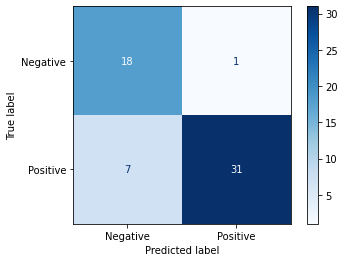

In [37]:
plot_confusion_matrix(model1, X_test, Y_test, cmap='Blues', display_labels=['Negative', 'Positive'])
plt.show()

SVC

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(C=10)

In [40]:
svc.fit(X_train, Y_train)

SVC(C=10)

In [41]:
svc.score(X_test, Y_test)

0.8947368421052632

In [42]:
Y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.97      0.87      0.92        38

    accuracy                           0.89        57
   macro avg       0.88      0.91      0.89        57
weighted avg       0.91      0.89      0.90        57



In [43]:
Y_preds = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_preds, labels=[1,0]))

[[33  5]
 [ 1 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


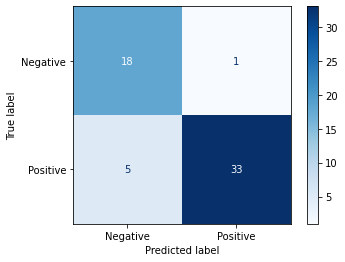

In [44]:
plot_confusion_matrix(svc, X_test, Y_test, cmap='Blues', display_labels=['Negative', 'Positive'])
plt.show()

RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rmf = RandomForestClassifier()

In [47]:
rmf.fit(X_train, Y_train)

RandomForestClassifier()

In [48]:
rmf.score(X_test, Y_test)

0.9122807017543859

In [49]:
Y_pred=rmf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.97      0.89      0.93        38

    accuracy                           0.91        57
   macro avg       0.89      0.92      0.90        57
weighted avg       0.92      0.91      0.91        57



In [50]:
Y_preds = rmf.predict(X_test)
print(confusion_matrix(Y_test, Y_preds, labels=[1,0]))

[[34  4]
 [ 1 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


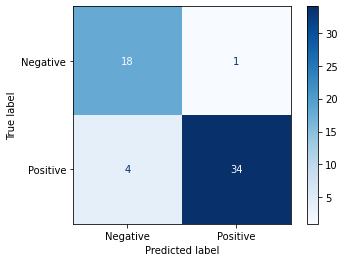

In [51]:
plot_confusion_matrix(rmf, X_test, Y_test, cmap='Blues', display_labels=['Negative', 'Positive'])
plt.show()

Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
mnb = MultinomialNB()

In [54]:
mnb.fit(X_train, Y_train)

MultinomialNB()

In [55]:
mnb.score(X_test, Y_test)

0.9473684210526315

In [56]:
Y_pred=mnb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.97      0.95      0.96        38

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [57]:
Y_preds = mnb.predict(X_test)

In [58]:
print(confusion_matrix(Y_test, Y_preds, labels=[1,0]))

[[36  2]
 [ 1 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


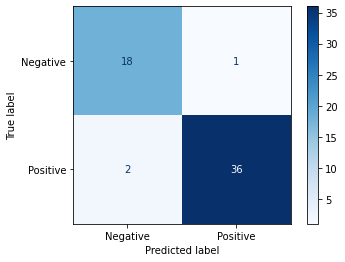

In [59]:
plot_confusion_matrix(mnb, X_test, Y_test, cmap='Blues', display_labels=['Negative', 'Positive'])
plt.show()

Logistic Regression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [63]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8421052631578947


In [64]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [65]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8771929824561403


In [66]:
Y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [67]:
Y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.94      0.87      0.90        38

    accuracy                           0.88        57
   macro avg       0.86      0.88      0.87        57
weighted avg       0.89      0.88      0.88        57



In [68]:
Y_preds = X_test_prediction

In [69]:
print(confusion_matrix(Y_test, Y_preds, labels=[1,0]))

[[33  5]
 [ 2 17]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


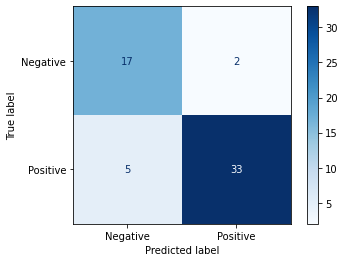

In [70]:
plot_confusion_matrix(model, X_test, Y_test, cmap='Blues', display_labels=['Negative', 'Positive'])
plt.show()